In [2]:
df = read.csv('C:/Users/MANI/Documents/R sem 2/linear_regression/50_Startups.csv')
df

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.20,136897.80,471784.10,New York,192261.83
162597.70,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.90,99814.71,362861.36,New York,156991.12
134615.46,147198.87,127716.82,California,156122.51
130298.13,145530.06,323876.68,Florida,155752.60
120542.52,148718.95,311613.29,New York,152211.77
123334.88,108679.17,304981.62,California,149759.96


In [3]:
library(ggplot2)
library(caTools)
library(corrgram)
library(corrplot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'corrgram' was built under R version 3.6.2"Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus
Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


In [4]:
summary(df)

   R.D.Spend      Administration   Marketing.Spend         State   
 Min.   :     0   Min.   : 51283   Min.   :     0   California:17  
 1st Qu.: 39936   1st Qu.:103731   1st Qu.:129300   Florida   :16  
 Median : 73051   Median :122700   Median :212716   New York  :17  
 Mean   : 73722   Mean   :121345   Mean   :211025                  
 3rd Qu.:101603   3rd Qu.:144842   3rd Qu.:299469                  
 Max.   :165349   Max.   :182646   Max.   :471784                  
     Profit      
 Min.   : 14681  
 1st Qu.: 90139  
 Median :107978  
 Mean   :112013  
 3rd Qu.:139766  
 Max.   :192262  

In [5]:
str(df)

'data.frame':	50 obs. of  5 variables:
 $ R.D.Spend      : num  165349 162598 153442 144372 142107 ...
 $ Administration : num  136898 151378 101146 118672 91392 ...
 $ Marketing.Spend: num  471784 443899 407935 383200 366168 ...
 $ State          : Factor w/ 3 levels "California","Florida",..: 3 1 2 3 2 3 1 2 3 1 ...
 $ Profit         : num  192262 191792 191050 182902 166188 ...


# interpretation of structure the data has 50 observations and 5 columns

In [6]:
any(is.na(df))

[1] FALSE

In [7]:
num.cols <- sapply(df, is.numeric)

In [9]:
cor.data <- cor(df[,num.cols])

In [11]:
cor.data

,R.D.Spend,Administration,Marketing.Spend,Profit
R.D.Spend,1.0000000,0.24195525,0.72424813,0.9729005
Administration,0.2419552,1.00000000,-0.03215388,0.2007166
Marketing.Spend,0.7242481,-0.03215388,1.00000000,0.7477657
Profit,0.9729005,0.20071657,0.74776572,1.0000000


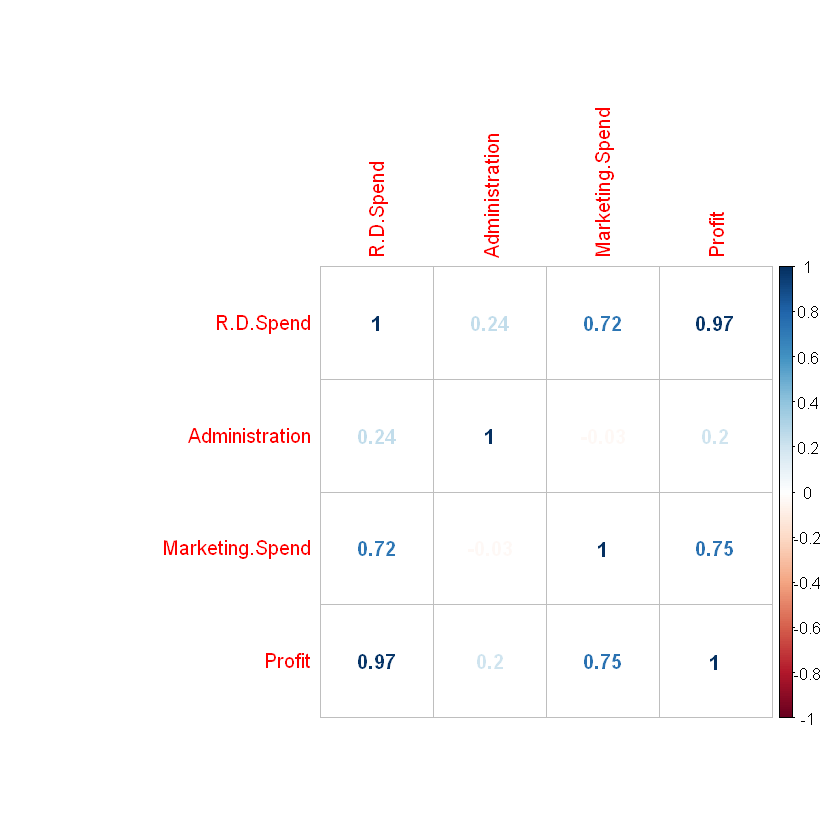

In [12]:
corrplot(cor.data, method='number')

# Interpretation of the above correlation matrix tells that the profit is highly correlated with R&D spend that is 97% and with the marketing spend is 75%...So more profits comes from where startups are spending more money on R&D spend.

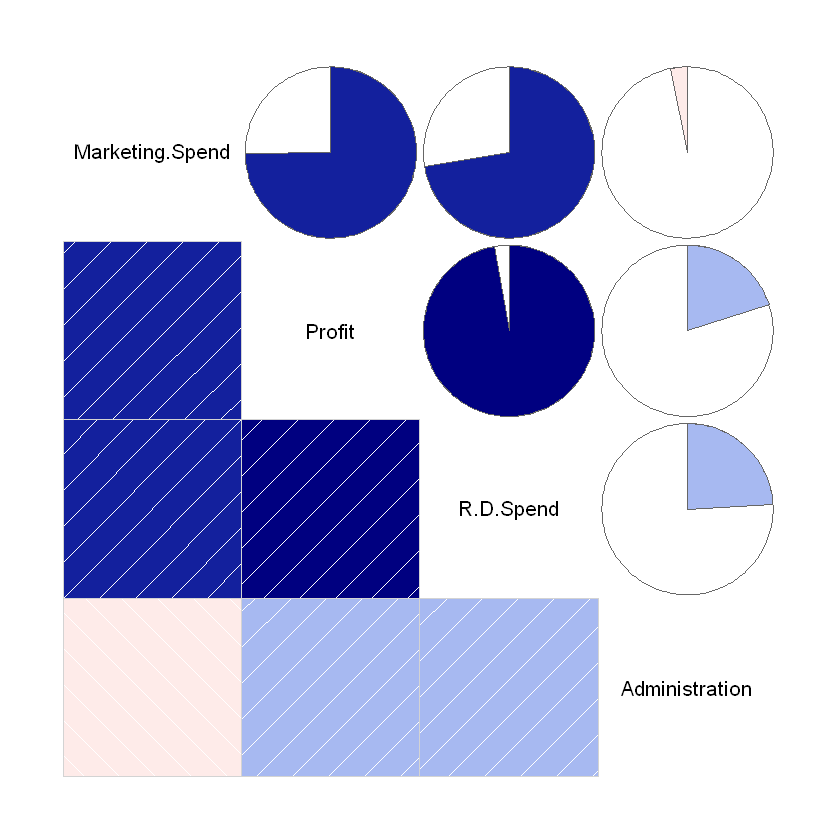

In [13]:
corrgram(df,order=TRUE, lower.panel=panel.shade,upper.panel=panel.pie, text.panel=panel.txt)

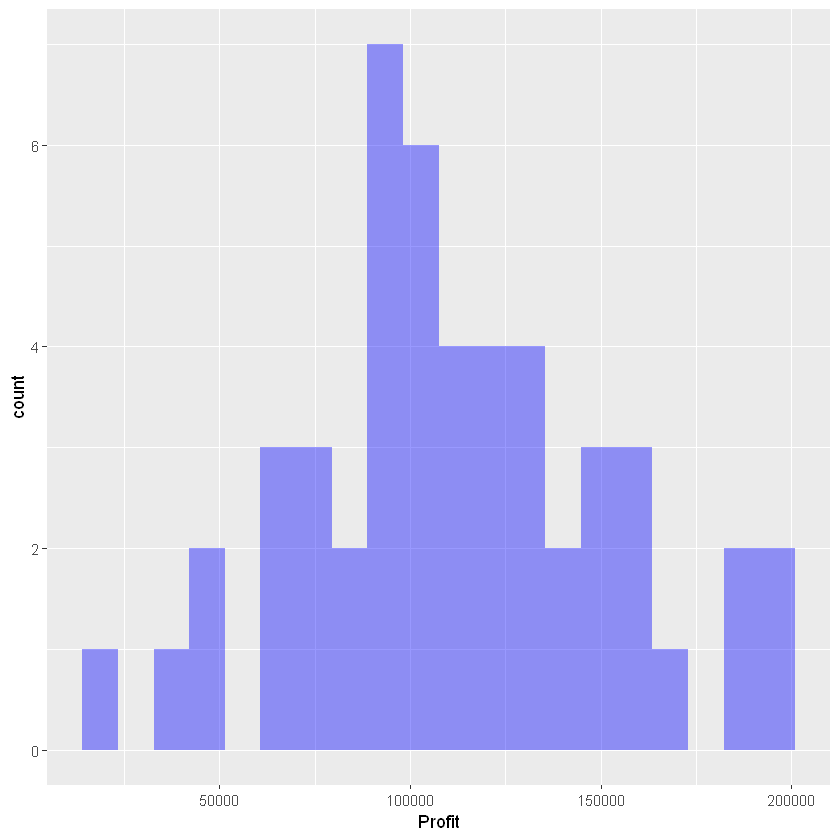

In [14]:
ggplot(df,aes(x=Profit)) + geom_histogram(bins=20,alpha=0.4,fill='blue')

# Interpretation from the histogram we can say that the the mean profit is around 1 lakh.There are some companies who has profits less than 50000 and companies who has more than 150000.

In [15]:
library(caTools)
set.seed(101)

In [16]:
sample <- sample.split(df$Profit, SplitRatio = 0.70)

In [17]:
train = subset(df, sample == TRUE)

In [18]:
test = subset(df, sample == FALSE)

In [19]:
model <- lm(Profit ~ R.D.Spend + Marketing.Spend ,train)

In [20]:
summary(model)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-34957  -2620    -27   3814  15582 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.852e+04  3.339e+03  14.531 1.21e-15 ***
R.D.Spend       7.745e-01  4.623e-02  16.755  < 2e-16 ***
Marketing.Spend 2.470e-02  1.706e-02   1.447    0.158    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9515 on 32 degrees of freedom
Multiple R-squared:  0.9478,	Adjusted R-squared:  0.9445 
F-statistic: 290.3 on 2 and 32 DF,  p-value: < 2.2e-16


# Interpretation of summary model gives that R&D spend ,marketing spend has more stars.Those variables are highly statistically significant for dependent variable.So we will use that independent variables to predict profit(response variable).

In [21]:
res <- residuals(model)

In [22]:
res <- as.data.frame(res)

In [23]:
head(res)

,res
1,4017.7553
2,6367.8252
4,13093.0656
5,-1445.9753
6,-2637.2303
7,180.4135


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


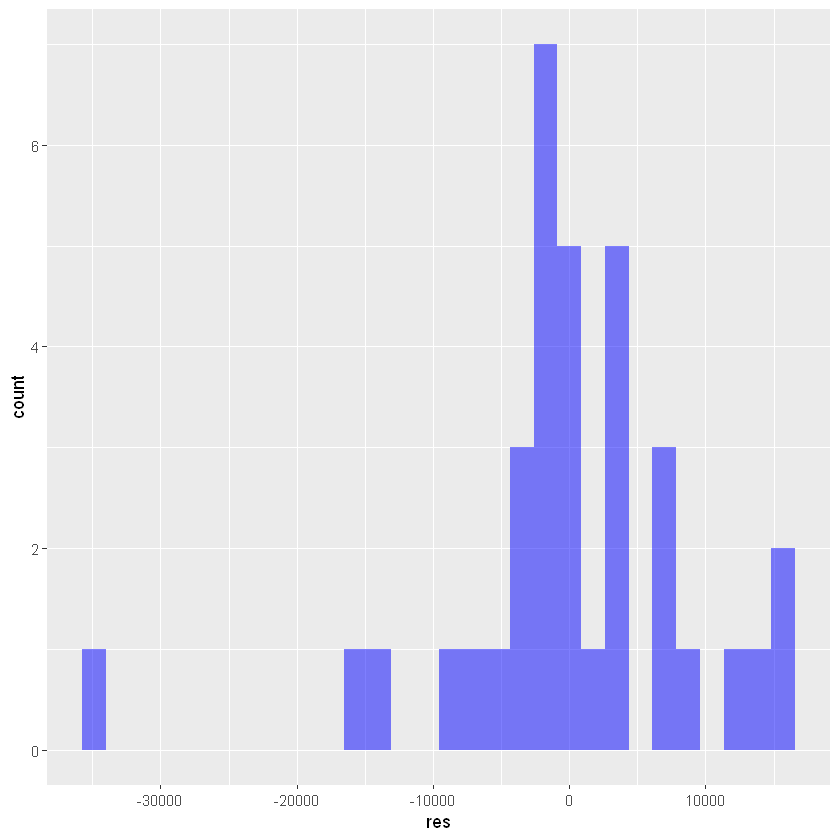

In [24]:
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

In [25]:
Profit.predictions <- predict(model,test)

In [26]:
results <- cbind(Profit.predictions,test$Profit) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
results

,pred,real
3,177444.19,191050.39
11,133118.15,146121.95
12,132665.21,144259.40
13,127394.32,141585.52
14,126014.65,134307.35
17,115475.62,126992.93
22,116641.19,111313.02
25,111668.23,108552.04
26,102015.45,107404.34
36,89238.14,96479.51


In [27]:
#removing negative predictions
to_zero <- function(x){
  if  (x < 0){
    return(0)
  }else{
    return(x)
  }
}

In [28]:
results$pred <- sapply(results$pred,to_zero)
print(results)

        pred      real
3  177444.19 191050.39
11 133118.15 146121.95
12 132665.21 144259.40
13 127394.32 141585.52
14 126014.65 134307.35
17 115475.62 126992.93
22 116641.19 111313.02
25 111668.23 108552.04
26 102015.45 107404.34
36  89238.14  96479.51
38  87522.75  89949.14
40  82709.83  81005.76
43  70488.79  71498.49
48  48522.74  42559.73
49  48942.58  35673.41


In [29]:
#evaluate the model
mse <- mean((results$real-results$pred)^2)
print(mse)

mse^0.5

SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$Profit) - results$real)^2)


R2 = 1 - SSE/SST
R2

[1] 82165124


[1] 9064.498

[1] 0.9487797

# Interpretation of R2 in multiple linear regression it gives us 86 percent accuracy that the model can explain the variability of response data around its line of fit.

# simple linear regression

In [30]:
model <- lm(Profit ~ R.D.Spend,train)

In [31]:
summary(model)


Call:
lm(formula = Profit ~ R.D.Spend, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-35721  -3106  -1266   5047  16809 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.040e+04  3.127e+03   16.12   <2e-16 ***
R.D.Spend   8.197e-01  3.464e-02   23.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9672 on 33 degrees of freedom
Multiple R-squared:  0.9443,	Adjusted R-squared:  0.9427 
F-statistic:   560 on 1 and 33 DF,  p-value: < 2.2e-16


# In simple linear regression we took R.D.Spend as independent variable because it has more correlation with the profit and we trained the model using lm method.

In [32]:
res <- residuals(model)

In [33]:
res <- as.data.frame(res)

In [34]:
head(res)

,res
1,6314.7894
2,8100.5555
4,14150.6268
5,-706.6371
6,-1517.0764
7,-4630.6150


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


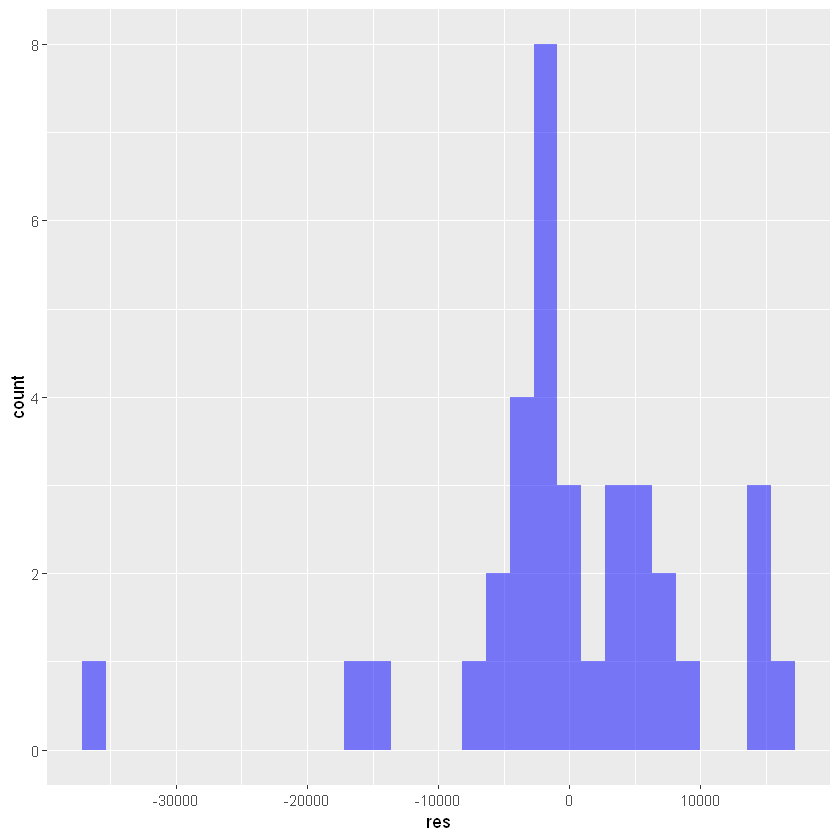

In [35]:
ggplot(res,aes(res)) +  geom_histogram(fill='blue',alpha=0.5)

In [36]:
Profit.predictions <- predict(model,test)

In [37]:
results <- cbind(Profit.predictions,test$Profit) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)
results

,pred,real
3,176185.74,191050.39
11,133945.42,146121.95
12,132928.02,144259.40
13,127347.00,141585.52
14,125812.96,134307.35
17,114353.47,126992.93
22,114661.99,111313.02
25,113559.06,108552.04
26,103411.15,107404.34
36,88122.29,96479.51


In [38]:
#removing negative predictions
to_zero <- function(x){
  if  (x < 0){
    return(0)
  }else{
    return(x)
  }
}

In [39]:
results$pred <- sapply(results$pred,to_zero)
print(results)

        pred      real
3  176185.74 191050.39
11 133945.42 146121.95
12 132928.02 144259.40
13 127347.00 141585.52
14 125812.96 134307.35
17 114353.47 126992.93
22 114661.99 111313.02
25 113559.06 108552.04
26 103411.15 107404.34
36  88122.29  96479.51
38  86528.64  89949.14
40  82010.65  81005.76
43  69782.00  71498.49
48  50402.40  42559.73
49  50846.74  35673.41


In [40]:
#evaluate the model
mse <- mean((results$real-results$pred)^2)
print(mse)

mse^0.5

SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$Profit) - results$real)^2)


R2 = 1 - SSE/SST
R2

[1] 90782664


[1] 9527.994

[1] 0.9434077

# Interpretation of R2 in simple linear regression it gives the 87% accuracy that the model can explain variability of response data around its line of fit.

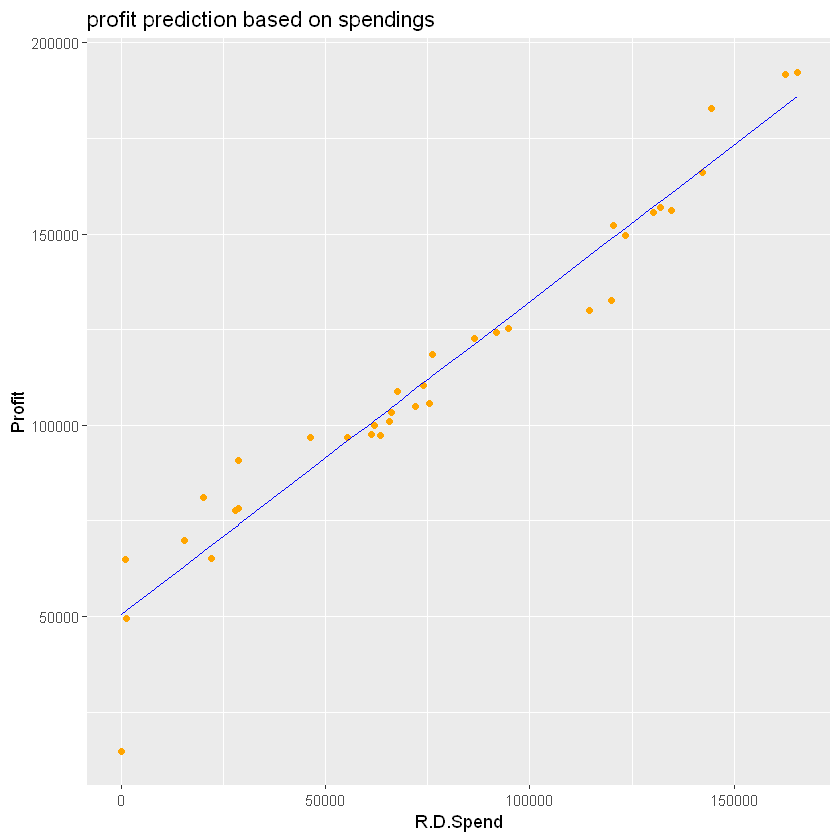

In [41]:
ggplot()+
geom_point(aes(x=train$R.D.Spend, y = train$Profit), colour = 'orange') +
geom_line(aes(x = train$R.D.Spend, y = predict(model, newdata = train)), colour = 'blue') + 
ggtitle('profit prediction based on spendings') +
xlab('R.D.Spend') +
ylab('Profit')

# points are the actual data and the line is the predicted data for the given R.D.Spend